# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

I have two very similar datasets to draw upon. One is from Scopus, and one is from an in-house dataset from the University of Missouri-St. Louis (UMSL). They both contain bibliographic metadata about articles published by members of the UMSL faculty.

The faculty provided metadata is at: https://raw.githubusercontent.com/e3la/eda-checkpoint/starter-main/articles.csv

The scopus export is at:
https://raw.githubusercontent.com/e3la/eda-checkpoint/starter-main/umsl-scholarship.csv

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [153]:
# import dependencies with aliases
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [154]:
# make my dataframe using .read_csv - I am using the raw link to my articles csv file because that's the easiest way I've found when using google colab

url = 'https://raw.githubusercontent.com/e3la/eda-checkpoint/starter-main/articles.csv'
url2 = 'https://raw.githubusercontent.com/e3la/eda-checkpoint/starter-main/umsl-scholarship.csv'

fac_df= pd.read_csv(url)
sco_df= pd.read_csv(url2)

In [155]:
#printing info() to help me get to know the columns and datatypes
print(fac_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5662 entries, 0 to 5661
Data columns (total 39 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   First Name                                                               5662 non-null   object 
 1   Last Name                                                                5662 non-null   object 
 2   Type                                                                     5662 non-null   object 
 3   Title                                                                    5662 non-null   object 
 4   Journal                                                                  5109 non-null   object 
 5   Date                                                                     2331 non-null   object 
 6   Year                                                                    

In [156]:
#getting the columns of data helps me get to know what is in there
print(sco_df.info())

print(sco_df.shape,"\n")
#248 columns is a lot of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2892 entries, 0 to 2891
Columns: 248 entries, title to author30_is_corporate
dtypes: float64(128), object(120)
memory usage: 5.5+ MB
None
(2892, 248) 



In [157]:
print("Scopus:\n",sco_df.head())

Scopus:
                                                title  \
0  Association between seroprevalence of measles ...   
1  Composition and function of the Galapagos peng...   
2  Perceived network bridging influences the care...   
3  Unraveling Amazon tree community assembly usin...   
4  Publisher Correction: Insights into the mechan...   

  => BEGIN UNMAPPED SCOPUS METADATA (MODIFY/RENAME/DELETE COLUMNS AS NEEDED)  \
0                                                                              
1                                                                              
2                                                                              
3                                                                              
4                                                                              

  Open Access  Gold OA Hybrid Gold OA Bronze OA  Green Final OA  \
0          OA  Gold OA              -         -               -   
1          OA  Gold OA              -  

In [158]:
print("Faculty Input:\n",fac_df.head())

Faculty Input:
   First Name Last Name     Type  \
0    Michael   Allison  Article   
1    Michael   Allison  Article   
2    Richard      Cook  Article   
3    Richard      Cook  Article   
4    Francis     Grady  Article   

                                               Title  \
0             Investigating the Biomedical Workforce   
1  Investigating the US Biomedical Workforce: Gen...   
2  Review of "The Power of Negative Thinking: Cyn...   
3  Review of "Emerson's Ghosts:Literature, Politi...   
4                      Chaucer's Langland's Boethius   

                        Journal  Date    Year   Volume       Pages Issue  ...  \
0     Science and Public Policy  2019  2019.0       46     913-926     6  ...   
1     Science and Public Policy  2019  2019.0       46     913-926     6  ...   
2  Studies in American Culture    NaN  2010.0  October         NaN   NaN  ...   
3   Studies in American Culture   NaN  2009.0      NaN  4 ms pages   NaN  ...   
4  Yearbook of Langland Studies

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [159]:
df1 = fac_df
print("from faculty:\n",df1.describe())


from faculty:
               Year  Times Cited  Impact Factor  Journal Quartile
count  5353.000000   389.000000            0.0               0.0
mean   2018.041098     7.979434            NaN               NaN
std       3.752900    13.631928            NaN               NaN
min    1991.000000     0.000000            NaN               NaN
25%    2016.000000     1.000000            NaN               NaN
50%    2018.000000     4.000000            NaN               NaN
75%    2021.000000     9.000000            NaN               NaN
max    2025.000000   168.000000            NaN               NaN


In [160]:
df2 = sco_df
print("from scopus:\n",df2.describe())

#knock out all those author columns out for the analysis bit (but not for the final project bits)
not_author_columns = [column for column in sco_df.columns if 'author' not in column]
df3 = sco_df[not_author_columns]

print(df3.info())

from scopus:
        fulltext_url  disciplines  comments  create_openurl  custom_citation  \
count           0.0          0.0       0.0             0.0              0.0   
mean            NaN          NaN       NaN             NaN              NaN   
std             NaN          NaN       NaN             NaN              NaN   
min             NaN          NaN       NaN             NaN              NaN   
25%             NaN          NaN       NaN             NaN              NaN   
50%             NaN          NaN       NaN             NaN              NaN   
75%             NaN          NaN       NaN             NaN              NaN   
max             NaN          NaN       NaN             NaN              NaN   

       season      pubmedid  rights  author1_mname  author1_suffix  ...  \
count     0.0  9.750000e+02     0.0            0.0             0.0  ...   
mean      NaN  3.150812e+07     NaN            NaN             NaN  ...   
std       NaN  3.005957e+06     NaN            Na

In [168]:
print("there are some",sco_df['issn'].notnull().sum(),"ISSNs in the scopus export dataset")
print("there are only",fac_df['ISSN'].notnull().sum(),"ISSNs in the faculty provided dataset")
print("Each ISSN is one journal")
print(sco_df['issn'].value_counts())
print(fac_df['ISSN'].value_counts())
print("These numbers can tell us what journals faculty have published in most.")

there are some 2187 ISSNs in the scopus export dataset
there are only 850 ISSNs in the faculty provided dataset
Each ISSN is one journal
08862605    23
07484518    19
00131784    18
00219614    17
14770520    17
            ..
09545794     1
18663370     1
00029939     1
15734536     1
02755319     1
Name: issn, Length: 1143, dtype: int64
1552-6518    16
1538-2443    14
1573-6598    14
1931-7565    14
1873-7757    12
             ..
2168-2208     1
1097-6760     1
1520-6394     1
1872-7506     1
1521-0391     1
Name: ISSN, Length: 490, dtype: int64
These numbers can tell us what journals faculty have published in most.


In [ ]:
#one of my interests is using DOIs to find out open access information using the openaccessbutton api at https://openaccessbutton.org/api which  is something I'll investigate more later
print("there are some",sco_df['doi'].notnull().sum(),"DOIs in the scopus export dataset")
print("there are only",fac_df['DOI'].notnull().sum(),"DOIs in the faculty provided dataset")

there are some 2758 DOIs in the scopus export dataset
there are only 1690 DOIs in the faculty provided dataset


In [ ]:
print("faculty - df1:\n",df1.isna().sum())
#to check out how complete the data is from faculty
print("\nscopus (no author columns) - df3:\n",df3.isna().sum())
#to check out how complete the data is from scopus

faculty - df1:
 First Name                                                                    0
Last Name                                                                     0
Type                                                                          0
Title                                                                         0
Journal                                                                     553
Date                                                                       3331
Year                                                                        309
Volume                                                                     2805
Pages                                                                      2949
Issue                                                                      4136
URL                                                                        5086
Status                                                                        1
DOI                     

In [ ]:
df2['document_type'].value_counts()

article       2681
conference     102
editorial       51
book            47
letter          11
Name: document_type, dtype: int64

In [ ]:
df1['Article Type'].value_counts()

Article                                   3416
Critique / review                          160
Working paper                               82
Essay                                       69
Poem                                        43
Editorial                                   38
Column                                      23
Abstract                                    22
Annotated bibliography                      16
Presentation paper                          14
Letter to the editor                        12
Conference report                            7
Research                                     6
Original Research                            6
Research Report                              4
Short story                                  4
policy brief                                 3
Book Review                                  3
Law Review                                   2
Editor's Introduction to journal issue       2
Section Introduction                         2
Position Stat

In [ ]:
#filter df2 to only records where both fpage and lpage are not empty
filtered_df2 = df2[(~df2['fpage'].isna()) & (~df2['lpage'].isna())]

# Calculate the total sum of pages
total_pages = filtered_df2['lpage'].sub(filtered_df2['fpage']).sum()

print("Total Sum of Pages according to Scopus Dataset:", total_pages)

Total Sum of Pages according to Scopus Dataset: 104738.0


In [ ]:
import re #because regular expressions are neato!

#  function to extract page ranges and calculate sum
def sum_page_ranges(pages):
    # Initialize the sum to 0
    total_sum = 0

    # regular expression to find numeric ranges
    pattern = r'(\d+)-(\d+)'

    for page in pages:
        matches = re.findall(pattern, str(page))
        for match in matches:
            start, end = map(int, match)
            if start <= end: #but only if the first page is before the last page
                total_sum += end - start + 1

    return total_sum

# Apply the function to the 'Pages' column
total_pages_sum = sum_page_ranges(df1['Pages'])

print("Total Sum of Pages in 'Pages' Column from Faculty Submitted Dataset:", total_pages_sum)

Total Sum of Pages in 'Pages' Column from Faculty Submitted Dataset: 23628


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

there are only 1690 DOIs in the faculty provided dataset of 5662 records
there are some 2758 DOIs in the scopus export dataset of 2892 records


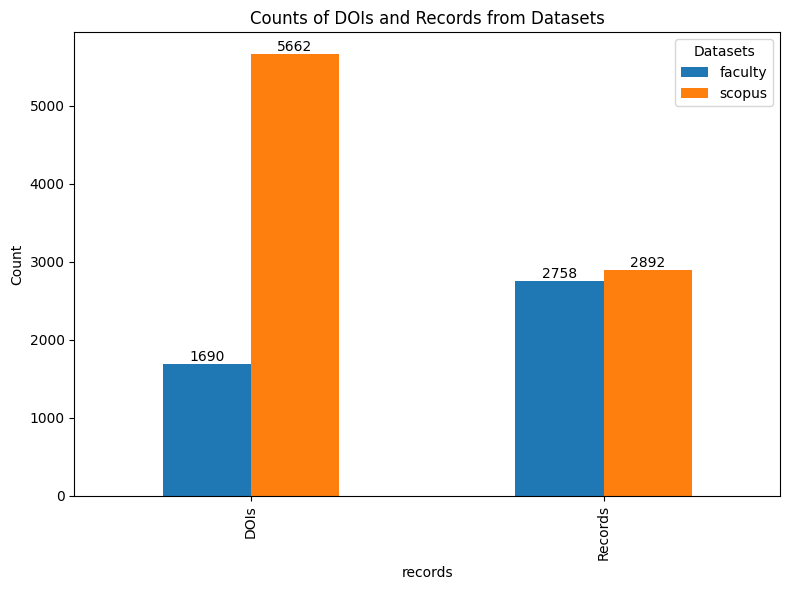

In [ ]:
print("there are only",df1['DOI'].notnull().sum(),"DOIs in the faculty provided dataset of",len(df1),"records")
print("there are some",df2['doi'].notnull().sum(),"DOIs in the scopus export dataset of",len(df2),"records")

# Create a DataFrame
data = {
    'records': ['DOIs', 'Records'],
    'faculty': [1690, 2758],
    'scopus': [5662, 2892]
}

df = pd.DataFrame(data)

df.set_index('records', inplace=True)

# Create a bar chart
ax = df.plot(kind='bar', figsize=(8, 6))

# Customize the plot
ax.set_ylabel('Count')
ax.set_title('Counts of DOIs and Records from Datasets')
ax.legend(title='Datasets')

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


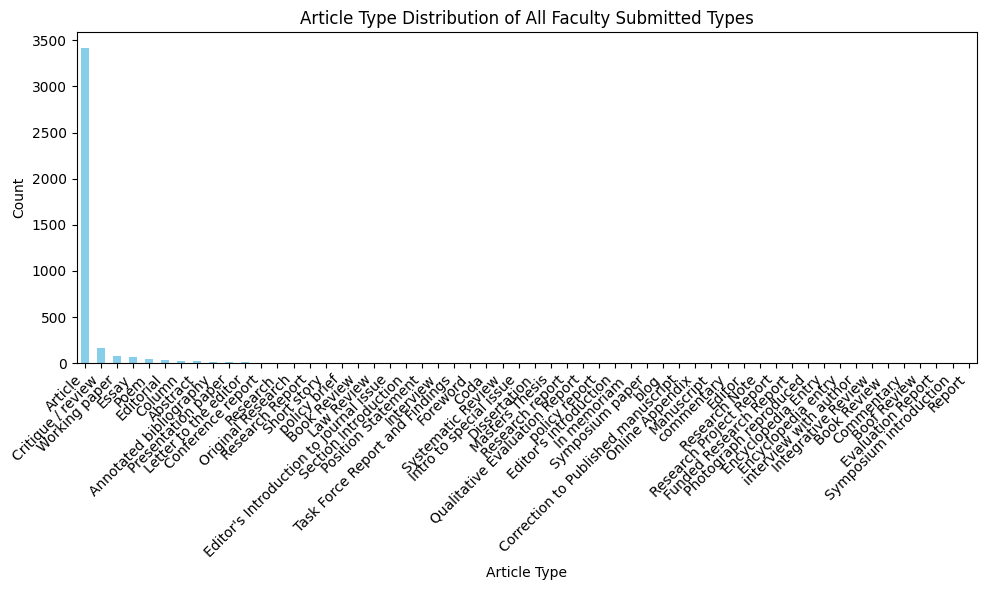

In [ ]:
# Get the value counts for 'Article Type' in faculty submitted data
article_type_counts = df1['Article Type'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
article_type_counts.plot(kind='bar', color='skyblue')
plt.title('Article Type Distribution of All Faculty Submitted Types')
plt.xlabel('Article Type')
plt.ylabel('Count')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


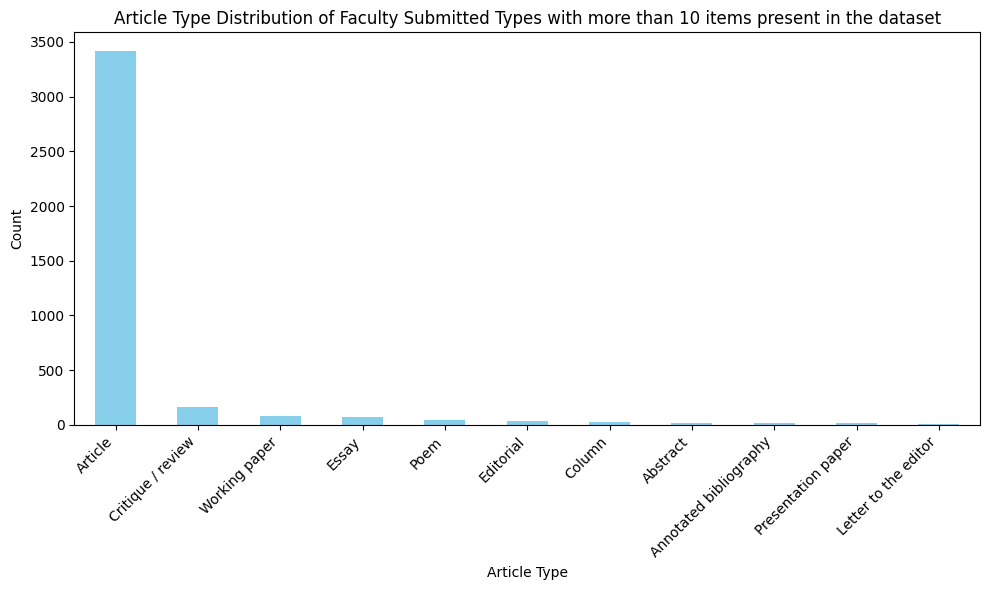

In [ ]:
# Get the value counts for 'Article Type' in faculty submitted data
article_type_counts = df1['Article Type'].value_counts()

# Filter value counts greater than 10
filtered_counts = article_type_counts[article_type_counts > 10]

# Create a bar chart
plt.figure(figsize=(10, 6))
filtered_counts.plot(kind='bar', color='skyblue')
plt.title('Article Type Distribution of Faculty Submitted Types with more than 10 items present in the dataset')
plt.xlabel('Article Type')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

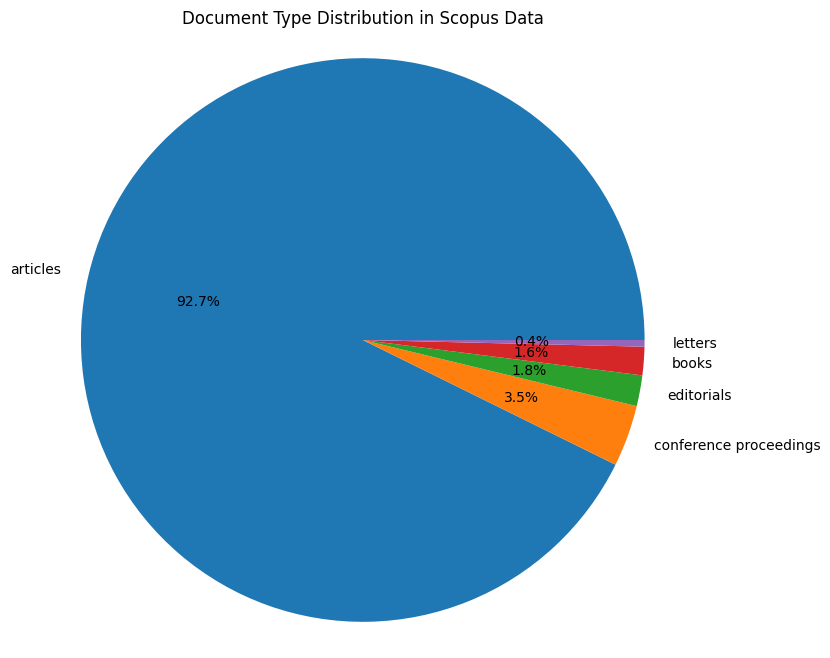

In [ ]:
data = {
    'document_type': ['articles', 'conference proceedings', 'editorials', 'books', 'letters'],
    'count': [2681, 102, 51, 47, 11]
}

pie = pd.DataFrame(data)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(pie['count'], labels=pie['document_type'], autopct='%1.1f%%')
plt.title('Document Type Distribution in Scopus Data')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Summarize Your Results

With your EDA complete, answer the following questions.

1) Was there anything surprising about your dataset?

*   I found difference between types of materials as categorized in scopus and by faculty themselves interesting.

2) Do you have any concerns about your dataset?

*   There are a lot of DOIs missing from the faculty provided dataset that I want to add so I can join these datasets together with a useful unique identifier.

3) Is there anything you want to make note of for the next phase of your analysis, which is cleaning data?

*   If I want to get a more accurate total number of pages written I'll have to dig into the records themselves.
*   I think to use the dataset as I wish, to identify open access works, I'll need to get all the DOIs I can, and limit to only those that have DOIs.